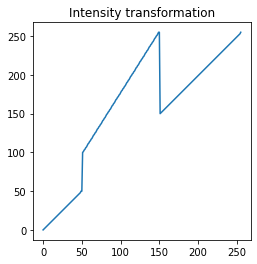

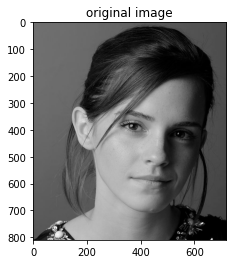

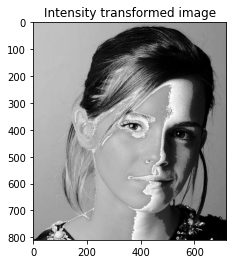

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img= cv.imread(r'Assignment Images/emma_gray.jpg',cv.IMREAD_UNCHANGED)
assert img is not None
t1=np.linspace(0,50,50)
t2=np.linspace(50,100,1)
t3=np.linspace(100,255,99)
t4=np.linspace(255,150,1)
t5=np.linspace(150,255,105)
t=np.concatenate((t1,t2,t3,t4,t5),axis=0).astype(np.uint8)
fig,ax=plt.subplots()
ax.plot(t)
ax.title.set_text("Intensity transformation")
ax.set_aspect('equal')
assert len(t)==256
g=cv.LUT(img,t)
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('image',img)
cv.waitKey(0)
cv.imshow('image',g)
cv.waitKey(0)
cv.destroyAllWindows()

plt.figure()
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("original image")
plt.show()
plt.figure()
plt.imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))
plt.title("Intensity transformed image")
plt.show()

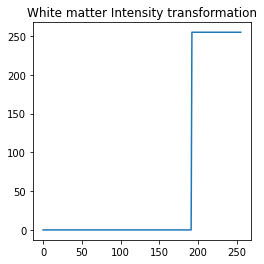

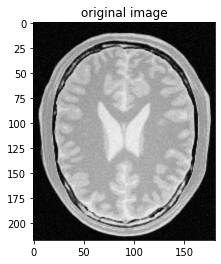

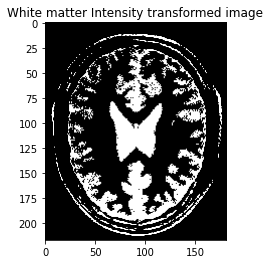

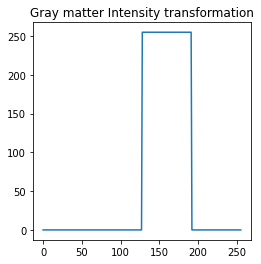

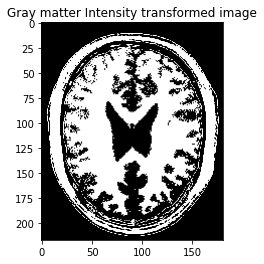

In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img= cv.imread(r'Assignment Images/brain_proton_density_slice.png',cv.IMREAD_UNCHANGED)
assert img is not None

# White Matter
t1=np.linspace(0,0,192)
t2=np.linspace(0,255,0)
t3=np.linspace(255,255,64)
t=np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
fig,ax=plt.subplots()
ax.plot(t)
ax.title.set_text("White matter Intensity transformation")
ax.set_aspect('equal')
assert len(t)==256
g=cv.LUT(img,t)
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('image',img)
cv.waitKey(0)
cv.imshow('image',g)
cv.waitKey(0)
cv.destroyAllWindows()

plt.figure()
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("original image")
plt.show()
plt.figure()
plt.imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))
plt.title("White matter Intensity transformed image")
plt.show()


#Gray Matter
t1= np.linspace(0,0,128)
t2=np.linspace(0,255,0)
t3=np.linspace(255,255,64)
t4=np.linspace(255,0,0)
t5=np.linspace(0,0,64)
t=np.concatenate((t1,t2,t3,t4,t5),axis=0).astype(np.uint8)
fig,ax=plt.subplots()
ax.plot(t)
ax.title.set_text("Gray matter Intensity transformation")
ax.set_aspect('equal')
assert len(t)==256
g=cv.LUT(img,t)
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('image',img)
cv.waitKey(0)
cv.imshow('image',g)
cv.waitKey(0)
cv.destroyAllWindows()

plt.figure()
plt.imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))
plt.title("Gray matter Intensity transformed image")
plt.show()


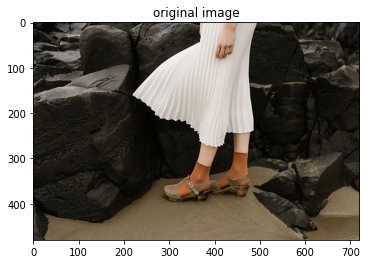

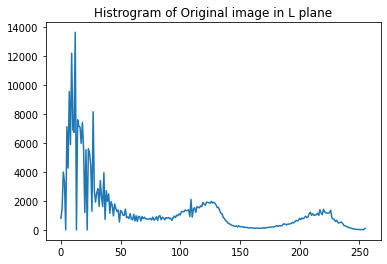

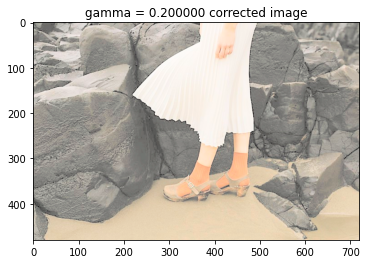

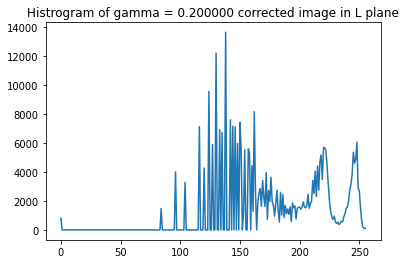

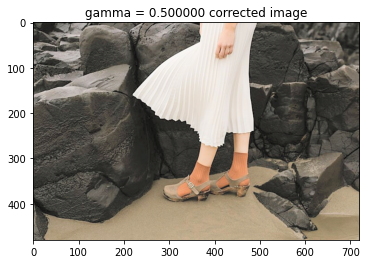

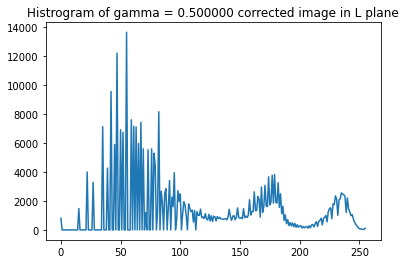

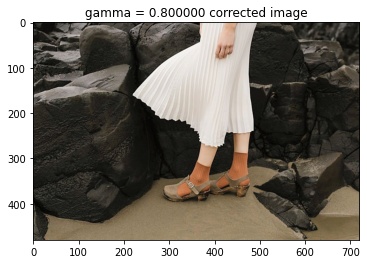

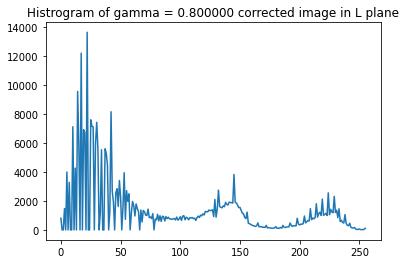

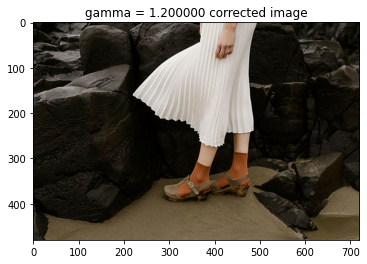

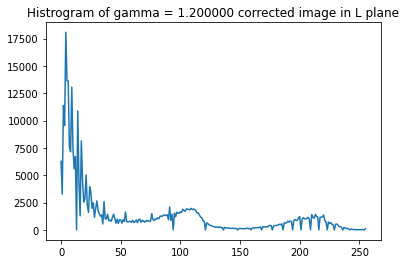

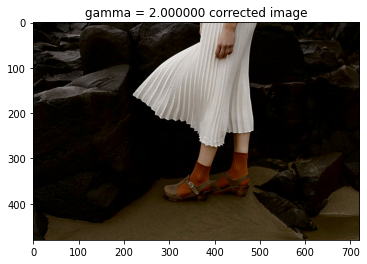

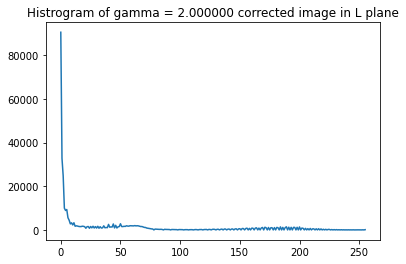

In [14]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img= cv.imread(r'Assignment Images/highlights_and_shadows.jpg',cv.IMREAD_UNCHANGED)
assert img is not None
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('image',img)
cv.waitKey(0)
plt.figure()
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("original image")

lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
l,a,b = cv.split(lab)
hist_img=cv.calcHist([lab],[0],None,[256],[0,256])
fig,ax=plt.subplots()
ax.plot(hist_img)
ax.title.set_text("Histrogram of Original image in L plane")

gamma = [0.2,0.5,0.8,1.2,2]
for i in gamma:
    t= np.array([(p/255)**i*255 for p in range(0,256)]).astype(np.uint8)
    g_l=cv.LUT(l,t)
    g_lab=cv.merge([g_l,a,b])
    new_img=cv.cvtColor(g_lab,cv.COLOR_LAB2BGR)
    cv.imshow('gamma corrected image',new_img)
    cv.waitKey(0)
    cv.destroyAllWindows()

    plt.figure()
    plt.imshow(cv.cvtColor(new_img, cv.COLOR_BGR2RGB))
    plt.title(f"gamma = %f corrected image" % i)
    plt.show()
    hist_new_img=cv.calcHist([g_lab],[0],None,[256],[0,256])
    fig,ax=plt.subplots()
    ax.plot(hist_new_img)
    ax.title.set_text(f"Histrogram of gamma = %f corrected image in L plane" % i)
    


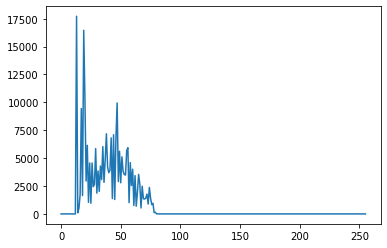

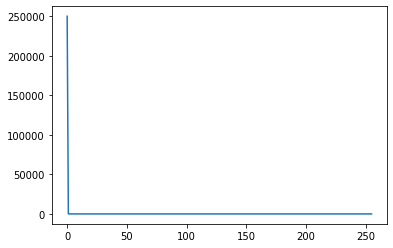

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
img = cv.imread(r"Assignment Images/shells.png",cv.IMREAD_UNCHANGED)
img_flat=img.flatten()

def histogram_equalize(img,size):
    img_pixel_ =np.zeros((256,1)).astype(np.uint8)
    index_=np.linspace(0,255,256).reshape(256,1).astype(np.uint8)
    img_pixel=np.append(index_,img_pixel_,axis=1)
    for j in range(size):
        img_pixel[img[j],1]+=1 #increse the intensity count

    #Cumulative sum
    sum=0
    for i in range(256):
        sum+=img_pixel[i,1]
        img_pixel[i,1]=sum
        img_pixel[i,1]= round(img_pixel[i,1]*255/(size))
    hist_img=np.zeros((1,size)).astype(np.uint8)
    for i in range(size):
        hist_img[0,i] = img_pixel[img[i],1]
    new_img=hist_img[0,:]
    return new_img



def histogram(img,size):
    img_pixel =np.zeros((256,1))
    index_=np.linspace(0,255,256).reshape(256,1).astype(np.uint8)
    img_pixel=np.append(index_,img_pixel,axis=1)
    for j in range(size):
        img_pixel[int(img[j]),1]+=1
    plt.figure()
    plt.plot(img_pixel[:,0],img_pixel[:,1])
    plt.show()
size=np.shape(img_flat)[0]
histogram(img_flat,size) #plot histogram of original image
hist_image=histogram_equalize(img_flat,size)
histogram(hist_image,size) #plot histogram of equalized image
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('image',img)
cv.waitKey(0)
cv.imshow('image',hist_image.reshape(500,500))
cv.waitKey(0)
cv.destroyAllWindows()

3